In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")


from google.colab import drive
from pathlib import Path
drive.mount('/content/drive/')
path = Path('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
xls = pd.ExcelFile("/content/drive/MyDrive/Python/2.6 Как врать со статистикой/Данные для домашнего задания.xlsx")
df1 = pd.read_excel(xls, 'задание 1')
df2 = pd.read_excel(xls, 'задание 2')

In [60]:
#Удалим столбцы, состоящие исключительно из NaN:

df1.dropna(axis='columns',how='all', inplace=True)
df1.head()

,year,company,"revenue, $K",rate
0,2008,Shmuber,5,1
1,2008,Kett,1000,1
2,2008,Tindex Taxi,890,1
3,2008,Krap,899,1
4,2008,Loft,760,1


Подозрительно, что доход всех компаний в отчете, переденном для публикации, начинается с 2008-го года и для всех них равен нулю. Построим графики доходов компаний самостоятельно:

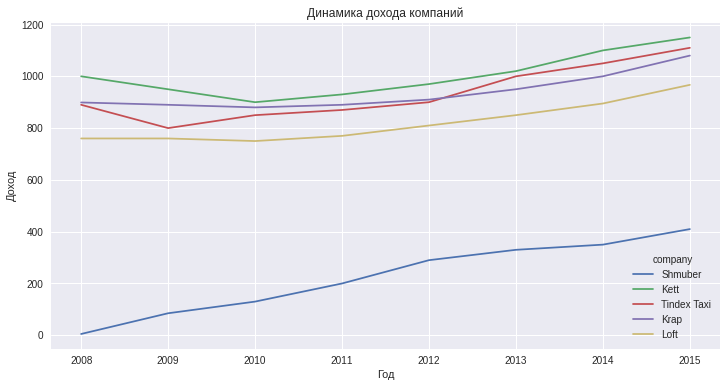

In [58]:
data = df1
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data = data, x = "year", y = "revenue, $K", hue="company")

ax.set_title("Динамика дохода компаний")
ax.set_xlabel("Год")
ax.set_ylabel("Доход")

plt.show()

Как мы видим, только у компании "Shumber" в 2008-ом году доход был нулевой. При этом у конкурентов он намного вышел был и тогда, и во время всего отчестного периода. При этом, действительно, доходы компании "Shumber" росли всё время, а доходы конкурентов иногда падали.

Я бы дополнительно запросил годы основания остальных компаний, а также их доходы за всё время.

In [80]:
df2.drop(df2.index[[0]], inplace=True)
df2.drop(df2.index[7:], inplace=True)

df2



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,Filip,109,0.0829528,2019
2,Widek,100,0.0761035,2019
3,Zanudsi,80,0.0608828,2019
4,Samzunh,77,0.0585997,2019
5,Paranoic,77,0.0585997,2019
6,Brenni,60,0.0456621,2019
7,others,811,0.617199,2019


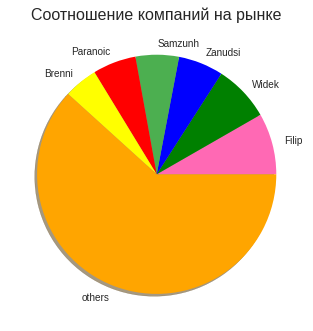

In [100]:
y = df2["Unnamed: 1"]
mylabels = df2["Unnamed: 0"]
mycolors = ["hotpink", "green", "b", "#4CAF50", "red", "yellow", "orange"]
plt.title("Соотношение компаний на рынке", fontsize=16)
plt.pie(y, labels = mylabels, shadow = True, colors = mycolors)
plt.show() 

Во втором листе на пироге не отображены "others", а их - большинство.